In [1]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img1 = cv2.imread('dog_backpack.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('watermark_no_copy.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600, 600), cv2.INTER_AREA)

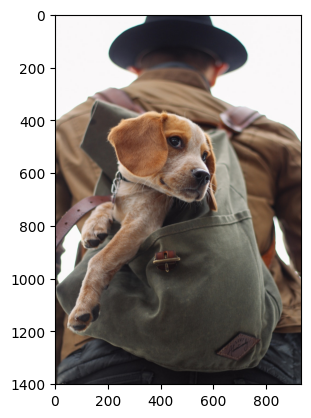

In [5]:
plt.imshow(img1)

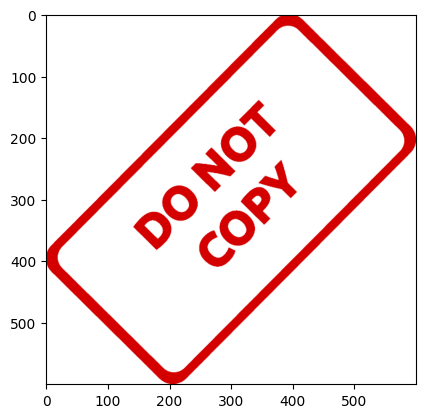

In [6]:
plt.imshow(img2)

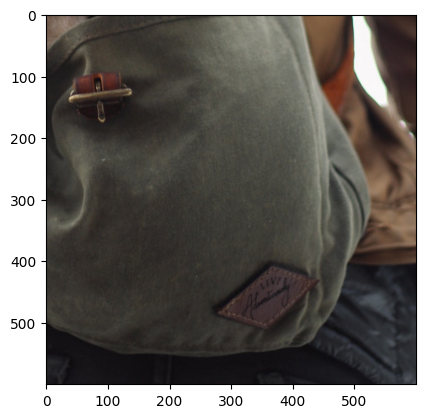

In [7]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

x_end = x_offset + img2.shape[1]
y_end = y_offset + img2.shape[0]

roi = img1[y_offset:y_end, x_offset:x_end]

plt.imshow(roi)

In [8]:
roi.shape

(600, 600, 3)

(600, 600)


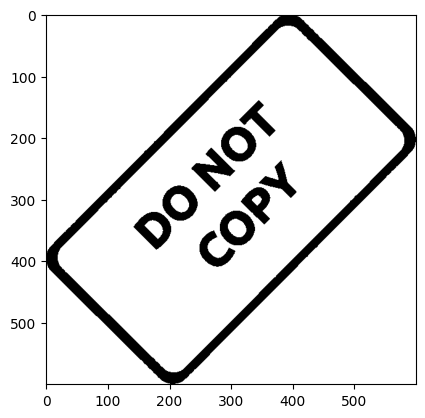

In [11]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img2_gray, 100, 255, cv2.THRESH_BINARY)

print(mask.shape)
plt.imshow(mask, cmap='gray')

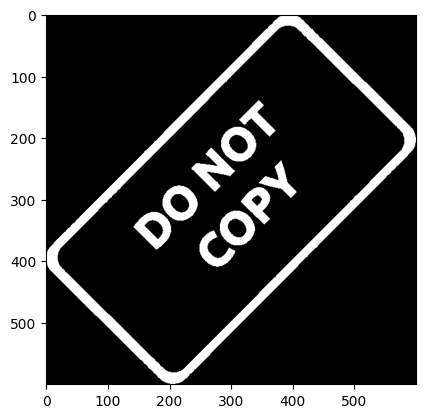

In [13]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

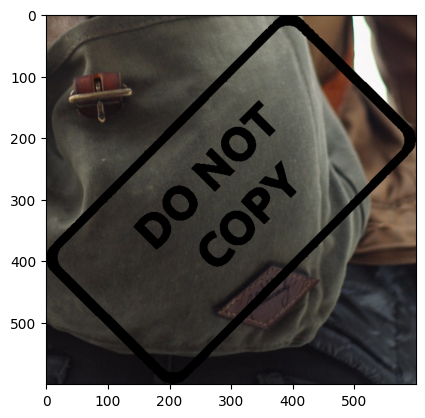

In [15]:
roi_background = cv2.bitwise_and(roi,roi, mask=mask)
plt.imshow(roi_background)

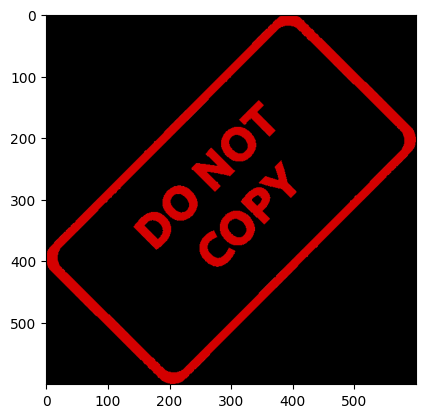

In [18]:
roi_foreground = cv2.bitwise_and(img2, img2, mask=mask_inv)
plt.imshow(roi_foreground)

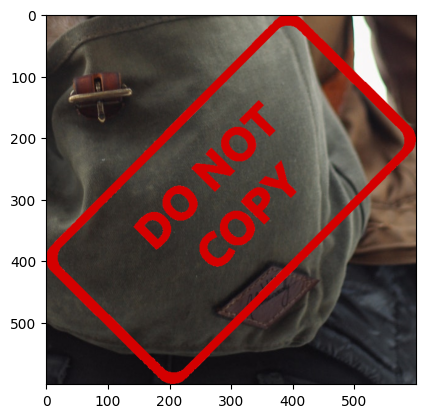

In [19]:
final_roid = cv2.add(roi_background, roi_foreground)
plt.imshow(final_roid)

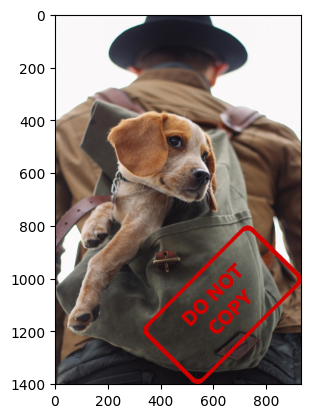

In [23]:
img1[y_offset:y_end, x_offset:x_end ] = final_roid

plt.imshow(img1)